<a href="https://colab.research.google.com/github/Eddietrantkt/CF_Quan22280073_Tuong22280102/blob/main/FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance pandas pandas-ta matplotlib mplfinance prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully un

In [3]:
!pip install prophet

# Import Python Libraries and set defalut value

In [16]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [17]:
start_time = "2021-01-01"
end_time = datetime.now()
ngan_hang_vn = ["VCB.VN", "TCB.VN", "ACB.VN", "MBB.VN", "BID.VN", "CTG.VN", "HDB.VN", "TPB.VN", "MSB.VN", "SHB.VN"]

# Download price-volume data

In [20]:
data = yf.download(ngan_hang_vn, start=start_time, end=end_time, auto_adjust=False)
print(data.head(3))

[*********************100%***********************]  11 of 11 completed


Price          Adj Close                                            \
Ticker            ACB.VN        BID.VN        CTG.VN        HDB.VN   
Date                                                                 
2021-01-04  10995.655273  27825.347656  24416.660156  10646.686523   
2021-01-05  11264.309570  27623.505859  24347.880859  10933.837891   
2021-01-06  11475.395508  28142.529297  26032.974609  11331.431641   

Price                                                                   \
Ticker           MBB.VN       MSB.VN       SHB.VN STB.VN        TCB.VN   
Date                                                                     
2021-01-04  8091.599609  7130.936035  7548.950195    NaN  15103.920898   
2021-01-05  8497.023438  7130.936035  7768.395996    NaN  15126.805664   
2021-01-06  8547.702148  7358.519043  7812.285645    NaN  15195.459961   

Price                     ...   Volume                                   \
Ticker            TPB.VN  ...   BID.VN      CTG.VN    HDB.V

# Download fundamental data

In [21]:
for ticker_symbol in ngan_hang_vn:
    print(f"\n--- Thông tin cơ bản cho {ticker_symbol} ---")
    try:
        ngan_hang = yf.Ticker(ticker_symbol).info

        # In ra một vài thông tin cơ bản quan trọng
        print(f"Tên công ty: {ngan_hang.get('longName', 'N/A')}")
        print(f"Ngành: {ngan_hang.get('industry', 'N/A')}")
        print(f"Vốn hóa thị trường: {ngan_hang.get('marketCap', 'N/A'):,}")
        print(f"Chỉ số P/E (Trailing): {ngan_hang.get('trailingPE', 'N/A')}")
        print(f"Chỉ số P/B: {ngan_hang.get('priceToBook', 'N/A')}")
        # Check if dividendYield is available before formatting
        dividend_yield = ngan_hang.get('dividendYield')
        if dividend_yield is not None:
            print(f"Tỷ suất cổ tức: {dividend_yield * 100:.2f}%")
        else:
            print("Tỷ suất cổ tức: N/A")
        print(f"Lợi nhuận ròng: {ngan_hang.get('netIncomeToCommon', 'N/A')}")
        print(f"Dòng tiền tự do: {ngan_hang.get('freeCashflow', 'N/A')}")
        print(f"Tổng tài sản: {ngan_hang.get('totalAssets', 'N/A')}")
        print(f"Tổng thu nhập: {ngan_hang.get('totalRevenue', 'N/A')}")
        print(f"Nợ phải trả: {ngan_hang.get('totalDebt', 'N/A')}")

    except Exception as e:
        print(f"Không thể lấy thông tin cho {ticker_symbol}: {e}")


--- Thông tin cơ bản cho VCB.VN ---
Tên công ty: Joint Stock Commercial Bank for Foreign Trade of Vietnam
Ngành: Banks - Regional
Vốn hóa thị trường: 517,216,302,792,704
Chỉ số P/E (Trailing): 23.86506
Chỉ số P/B: 2.4209478
Tỷ suất cổ tức: 72.00%
Lợi nhuận ròng: 31967177342976
Dòng tiền tự do: N/A
Tổng tài sản: N/A
Tổng thu nhập: 67891684704256
Nợ phải trả: 20729774997504

--- Thông tin cơ bản cho TCB.VN ---
Tên công ty: Vietnam Technological and Commercial Joint Stock Bank
Ngành: Banks - Regional
Vốn hóa thị trường: 287,186,243,026,944
Chỉ số P/E (Trailing): 13.500319
Chỉ số P/B: 1.8220856
Tỷ suất cổ tức: 245.00%
Lợi nhuận ròng: 21267893714944
Dòng tiền tự do: N/A
Tổng tài sản: N/A
Tổng thu nhập: 42332250439680
Nợ phải trả: 220686962393088

--- Thông tin cơ bản cho ACB.VN ---
Tên công ty: Asia Commercial Joint Stock Bank
Ngành: Banks - Regional
Vốn hóa thị trường: 132,268,903,366,656
Chỉ số P/E (Trailing): 7.8389707
Chỉ số P/B: 1.5166605
Tỷ suất cổ tức: 38

# Technical indicators


## RSI

### Khái niệm:
- RSI là một chỉ báo dao động đo lường tốc độ và sự thay đổi của các chuyển động giá. Nó di chuyển trong khoảng từ 0 đến 100. Theo lý thuyết, giá trị RSI trên 70 cho thấy cổ phiếu đang ở vùng "quá mua" (overbought) và có thể sắp điều chỉnh giảm. Ngược lại, giá trị dưới 30 cho thấy cổ phiếu đang ở vùng "quá bán" (oversold) và có thể sắp phục hồi.
### Giả thuyết:
- "Chúng ta có thể kiếm lợi nhuận bằng cách mua khi cổ phiếu đi vào vùng quá bán (RSI < 30) và bán khi nó đi vào vùng quá mua (RSI > 70)."
### Tín hiệu MUA:
- Nếu RSI của ngày hôm nay cắt xuống dưới ngưỡng 30.
### Tín hiệu BÁN:
- Nếu RSI của ngày hôm nay cắt lên trên ngưỡng 70.
### NẮM GIỮ (Hold/Long position):
- Sau khi có tín hiệu MUA, chúng ta sẽ giữ cổ phiếu cho đến khi có tín hiệu BÁN.
### KHÔNG NẮM GIỮ (Cash position):
- Sau khi có tín hiệu BÁN, chúng ta sẽ giữ tiền mặt cho đến khi có tín hiệu MUA tiếp theo.

## Chỉ số P/E (Price-to-Earnings Ratio)

### Khái niệm:
- Đây là chỉ số nổi tiếng nhất, cho bạn biết mức độ "đắt" hay "rẻ" của một cổ phiếu so với lợi nhuận mà nó tạo ra.
### Công thức:
- $P/E = \frac{\text{Giá thị trường của 1 cổ phiếu (Price)}}{\text{Lợi nhuận trên 1 cổ phiếu (EPS)}}$
### Ứng dụng:
- P/E thấp (ví dụ < 10): Có thể cổ phiếu đang bị định giá rẻ, hoặc thị trường không kỳ vọng công ty sẽ tăng trưởng trong tương lai.
- P/E cao (ví dụ > 20): Nhà đầu tư đang kỳ vọng rất lớn vào sự tăng trưởng lợi nhuận của công ty trong tương lai và sẵn sàng trả giá cao ngay bây giờ. Thường thấy ở các công ty công nghệ.

## Chỉ số P/B (Price-to-Book Ratio)

### Khái niệm:
- Chỉ số này so sánh giá bạn trả cho một cổ phiếu với giá trị tài sản ròng của công ty.
### Công thức:
- $P/B = \frac{\text{Giá thị trường của 1 cổ phiếu (Price)}}{\text{Giá trị sổ sách trên 1 cổ phiếu (Book Value per Share)}}$
### Ứng dụng:
- P/B = 0.8: Giá mua được rẻ hơn giá trị tài sản hữu hình. Đây có thể là một món hời.
- P/B = 5: Giá mua cao gấp 5 lần giá trị tài sản hữu hình.
- Rất hữu ích khi phân tích các công ty có nhiều tài sản hữu hình như ngân hàng, công ty bảo hiểm, nhà máy sản xuất.
- Ít hữu ích hơn với các công ty công nghệ, nơi tài sản lớn nhất là thương hiệu, phần mềm, nhân sự (tài sản vô hình).

## Tỷ suất Cổ tức (Dividend Yield)

### Khái niệm:
- Chỉ số này cho bạn biết bạn nhận được bao nhiêu tiền cổ tức so với giá bạn bỏ ra mua cổ phiếu.
### Công thức:
- $\text{Tỷ suất Cổ tức} = \frac{\text{Cổ tức hàng năm trên 1 cổ phiếu}}{\text{Giá thị trường của 1 cổ phiếu}} \times 100\%$
### Ứng dụng:
- Hấp dẫn với các nhà đầu tư muốn có dòng tiền thu nhập ổn định.
- Các công ty đã trưởng thành, kinh doanh ổn định (như Vinamilk, các công ty điện, nước) thường có tỷ suất cổ tức cao.
- Các công ty tăng trưởng nhanh thường không trả cổ tức hoặc trả rất ít, vì họ giữ lại lợi nhuận để tái đầu tư.
### Lưu ý quan trọng:
- Tỷ suất cổ tức cao bất thường có thể là một dấu hiệu rủi ro (giá cổ phiếu đã giảm mạnh).

# Trading strategies

[*********************100%***********************]  1 of 1 completed


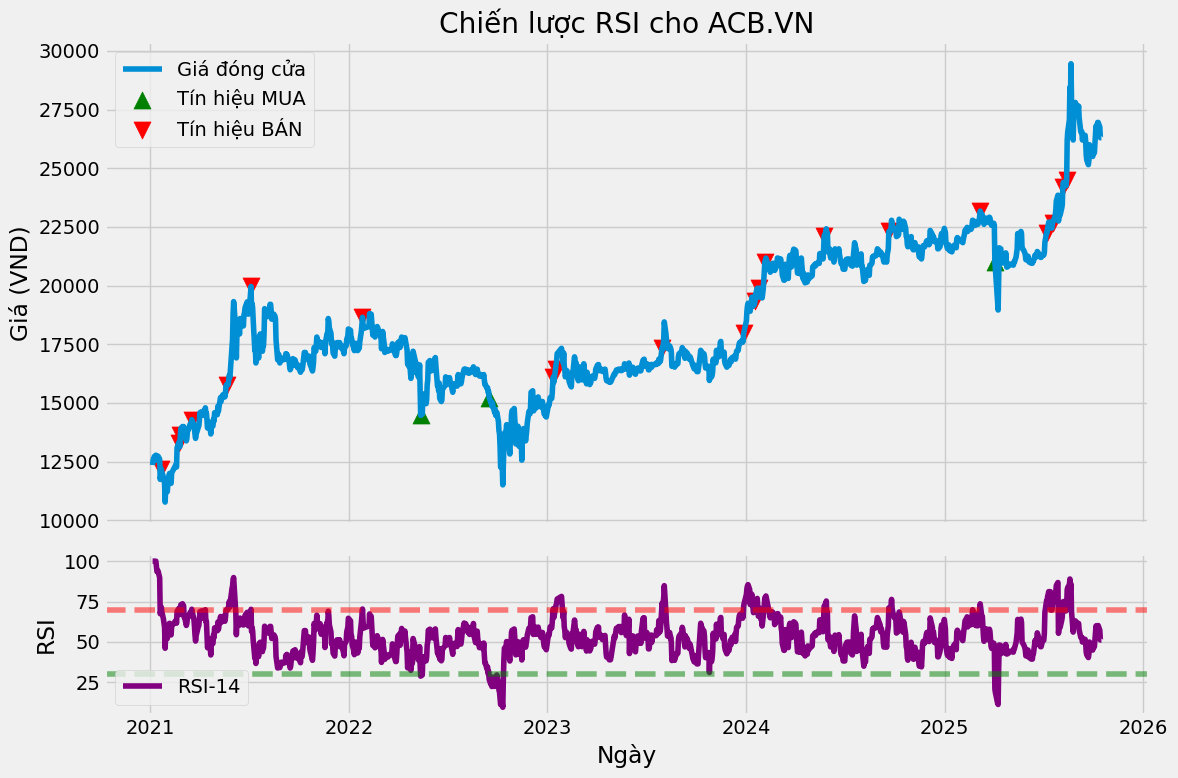

In [22]:
# --- 1. Tải và Chuẩn bị Dữ liệu ---
ticker = "ACB.VN"
data = yf.download(ticker, start=start_time, end=end_time, auto_adjust=False)

# Flatten the column names to a single level
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# --- 2. Tính toán Chỉ báo Kỹ thuật ---
# Sử dụng pandas_ta để tính RSI-14 và thêm vào DataFrame
data.ta.rsi(length=14, append=True)
data.dropna(inplace=True) # Xóa các hàng trống sau khi tính RSI

# --- 3. Tạo Tín hiệu Giao dịch ---
rsi_oversold = 30
rsi_overbought = 70

# Tạo cột tín hiệu dựa trên điều kiện
# 1 = Mua, -1 = Bán, 0 = Không làm gì
data['Signal'] = 0
# Tín hiệu MUA khi RSI cắt xuống dưới 30
buy_condition = (data['RSI_14'].shift(1) > rsi_oversold) & (data['RSI_14'] <= rsi_oversold)
# Tín hiệu BÁN khi RSI cắt lên trên 70
sell_condition = (data['RSI_14'].shift(1) < rsi_overbought) & (data['RSI_14'] >= rsi_overbought)

data.loc[buy_condition, 'Signal'] = 1
data.loc[sell_condition, 'Signal'] = -1

# --- Trực quan hóa Tín hiệu ---
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Biểu đồ giá và tín hiệu
# Need to use the correct column name after flattening, which is 'Close_FPT.VN'
ax1.plot(data.index, data['Close_ACB.VN'], label='Giá đóng cửa')
ax1.scatter(data.index[data['Signal'] == 1], data['Close_ACB.VN'][data['Signal'] == 1],
            label='Tín hiệu MUA', marker='^', color='green', s=150)
ax1.scatter(data.index[data['Signal'] == -1], data['Close_ACB.VN'][data['Signal'] == -1],
            label='Tín hiệu BÁN', marker='v', color='red', s=150)
ax1.set_title(f'Chiến lược RSI cho {ticker}')
ax1.set_ylabel('Giá (VND)')
ax1.legend()

# Biểu đồ RSI
ax2.plot(data.index, data['RSI_14'], label='RSI-14', color='purple')
ax2.axhline(rsi_overbought, linestyle='--', color='red', alpha=0.5)
ax2.axhline(rsi_oversold, linestyle='--', color='green', alpha=0.5)
ax2.set_ylabel('RSI')
ax2.set_xlabel('Ngày')
ax2.legend()

plt.tight_layout()
plt.show()

# Test using historical data

--- KẾT QUẢ BACKTESTING ---
Tổng lợi nhuận chiến lược: 97.63%
Tổng lợi nhuận Mua và Giữ: 212.94%


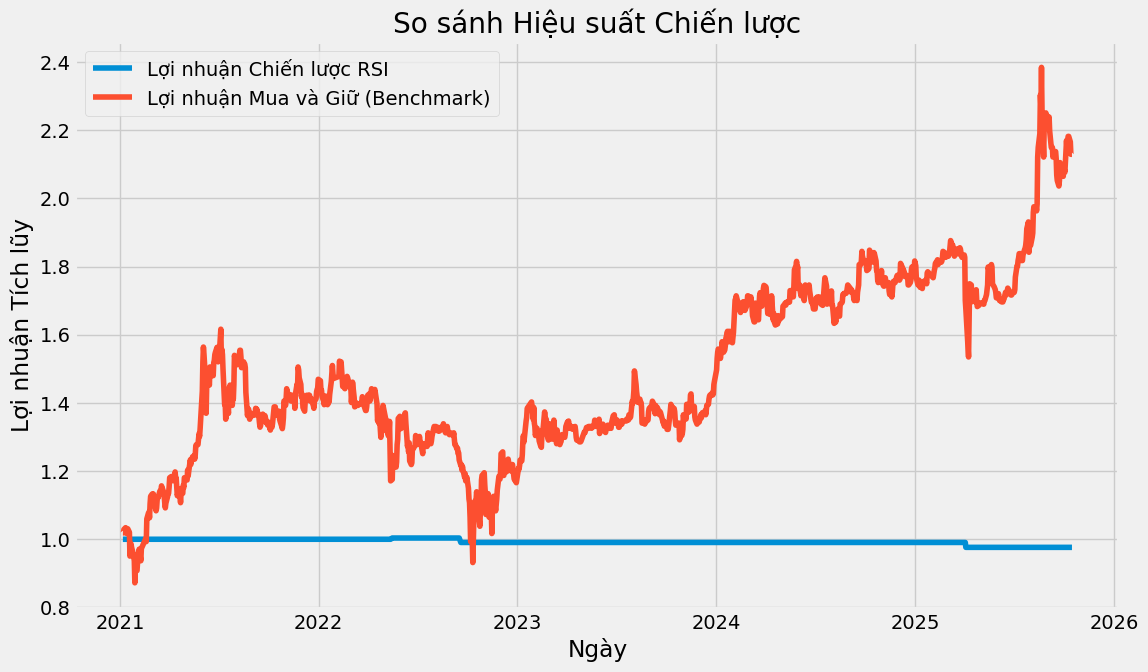

In [23]:
# --- 4. Backtesting Chiến lược ---

# Tạo cột 'Position' để thể hiện trạng thái nắm giữ (1) hoặc không nắm giữ (0)
# fillna(method='ffill') sẽ lấp đầy các giá trị trống bằng giá trị trước đó
data['Position'] = data['Signal'].replace(-1, 0).replace(1, 1)
data['Position'] = data['Position'].ffill().fillna(0)


# Tính toán lợi nhuận hàng ngày của thị trường (chiến lược Buy and Hold)
# Use the correct column name after flattening, which is 'Close_FPT.VN'
data['Market_Returns'] = data['Close_ACB.VN'].pct_change()

# Tính toán lợi nhuận hàng ngày của chiến lược
# Lợi nhuận chỉ được tính vào những ngày chúng ta đang NẮM GIỮ cổ phiếu
# Dùng shift(1) là CỰC KỲ QUAN TRỌNG: để tránh "nhìn trước tương lai".
# Lợi nhuận của hôm nay được quyết định bởi tín hiệu của ngày HÔM QUA.
data['Strategy_Returns'] = data['Market_Returns'] * data['Position'].shift(1)

# Tính toán lợi nhuận tích lũy
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# --- In kết quả và Vẽ biểu đồ hiệu suất ---
print("--- KẾT QUẢ BACKTESTING ---")
total_strategy_return = data['Cumulative_Strategy_Returns'].iloc[-1]
total_market_return = data['Cumulative_Market_Returns'].iloc[-1]
print(f"Tổng lợi nhuận chiến lược: {total_strategy_return:.2%}")
print(f"Tổng lợi nhuận Mua và Giữ: {total_market_return:.2%}")

# Vẽ biểu đồ so sánh hiệu suất
plt.figure(figsize=(12, 7))
plt.plot(data['Cumulative_Strategy_Returns'], label='Lợi nhuận Chiến lược RSI')
plt.plot(data['Cumulative_Market_Returns'], label='Lợi nhuận Mua và Giữ (Benchmark)')
plt.title('So sánh Hiệu suất Chiến lược')
plt.xlabel('Ngày')
plt.ylabel('Lợi nhuận Tích lũy')
plt.legend()
plt.show()

# Trading strategies using fundamental data

## Value Stocks

- Đây là cổ phiếu của những công ty tốt, ổn định nhưng đang được thị trường định giá thấp hơn giá trị thực của chúng.
- **Đặc điểm**: Công ty đã trưởng thành, có lịch sử kinh doanh lâu dài. Thường xuyên trả cổ tức đều đặn. Chỉ số P/E (Giá/Lợi nhuận) và P/B (Giá/Giá trị sổ sách) thấp hơn so với trung bình ngành. Hoạt động trong các ngành truyền thống như ngân hàng, hàng tiêu dùng, năng lượng.

## Growth Stocks


- Đây là cổ phiếu của những công ty được kỳ vọng sẽ tăng trưởng nhanh hơn nhiều so với phần còn lại của thị trường.
- **Đặc điểm**: Tăng trưởng doanh thu và lợi nhuận vượt trội. Thường không trả cổ tức (hoặc rất ít) vì họ tái đầu tư toàn bộ lợi nhuận để phát triển. Chỉ số P/E thường rất cao, vì nhà đầu tư sẵn sàng trả giá cao cho tiềm năng tương lai. Hoạt động trong các ngành đổi mới như công nghệ, phần mềm, y tế, thương mại điện tử.

## Implement Code

In [24]:
# Danh sách các cổ phiếu để sàng lọc (ví dụ một vài mã Blue-chip trên sàn HOSE)
tickers = ngan_hang_vn
value_stocks = []

# Định nghĩa các ngưỡng cho chiến lược giá trị
PE_THRESHOLD = 15.0
PB_THRESHOLD = 1.5
DIVIDEND_YIELD_THRESHOLD = 0.03 # 3%

print("--- BẮT ĐẦU SÀNG LỌC CỔ PHIẾU GIÁ TRỊ ---")
for ticker_str in tickers:
    try:
        info = yf.Ticker(ticker_str).info
        name = info.get('shortName')
        pe_ratio = info.get('trailingPE', float('inf')) # Mặc định là vô cùng lớn nếu không có
        pb_ratio = info.get('priceToBook', float('inf'))
        dividend_yield = info.get('dividendYield', 0.0)

        # Đếm số tiêu chí thỏa mãn
        conditions_met = 0
        if pe_ratio < PE_THRESHOLD: conditions_met += 1
        if pb_ratio < PB_THRESHOLD: conditions_met += 1
        if dividend_yield > DIVIDEND_YIELD_THRESHOLD: conditions_met += 1

        print(f"Đang xử lý {name}: P/E={pe_ratio:.2f}, P/B={pb_ratio:.2f}, Cổ tức={dividend_yield:.2%}")

        # Nếu thỏa mãn ít nhất 2 tiêu chí, thêm vào danh sách
        if conditions_met >= 2:
            value_stocks.append({
                "Mã CK": ticker_str.replace('.VN', ''),
                "Tên": name,
                "P/E": pe_ratio,
                "P/B": pb_ratio,
                "Cổ tức (%)": dividend_yield * 100
            })
    except Exception as e:
        print(f"Lỗi khi xử lý {ticker_str}: {e}")

# In kết quả
print("\n--- KẾT QUẢ: CÁC CỔ PHIẾU GIÁ TRỊ TIỀM NĂNG ---")
if value_stocks:
    df_value = pd.DataFrame(value_stocks)
    print(df_value.to_string(index=False))
else:
    print("Không tìm thấy cổ phiếu nào thỏa mãn các tiêu chí.")

--- BẮT ĐẦU SÀNG LỌC CỔ PHIẾU GIÁ TRỊ ---
Đang xử lý JS COMM BANK FOREIGN TRADE VIET: P/E=23.87, P/B=2.42, Cổ tức=72.00%
Đang xử lý VIETNAM TECHNOLOGICAL AND COMME: P/E=13.50, P/B=1.82, Cổ tức=245.00%
Đang xử lý ASIA COMMERCIAL BANK: P/E=7.84, P/B=1.52, Cổ tức=380.00%
Đang xử lý MILITARY COMMERCIAL JOINT STOCK: P/E=10.17, P/B=1.78, Cổ tức=110.00%
Đang xử lý JSC BANK FOR INV & DEV OF VIETN: P/E=14.12, P/B=1.74, Cổ tức=114.00%
Đang xử lý VIETNAM JOINT STOCK COMMERCIAL : P/E=9.31, P/B=1.72, Cổ tức=82.00%
Đang xử lý HO CHI MINH CITY DEV JS COMM BA: P/E=7.90, P/B=1.83, Cổ tức=342.00%
Đang xử lý SAIGON THUONG TIN COMMERCIAL JO: P/E=7.73, P/B=1.86, Cổ tức=0.00%
Đang xử lý TIEN PHONG COMMERCIAL JST BANK: P/E=7.94, P/B=1.33, Cổ tức=508.00%
Đang xử lý VIETNAM MARITIME COMMERCIAL JS : P/E=7.99, P/B=1.04, Cổ tức=0.00%
Đang xử lý SAIGON-HANOI COMMERCIAL JT-STOC: P/E=8.32, P/B=1.32, Cổ tức=243.00%

--- KẾT QUẢ: CÁC CỔ PHIẾU GIÁ TRỊ TIỀM NĂNG ---
Mã CK                             Tên       P/E      P

In [25]:
tickers = ngan_hang_vn
growth_stocks = []

# Định nghĩa các ngưỡng cho chiến lược tăng trưởng
REVENUE_GROWTH_THRESHOLD = 0.01
EARNINGS_GROWTH_THRESHOLD = 0.015

print("\n--- BẮT ĐẦU SÀNG LỌC CỔ PHIẾU TĂNG TRƯỞNG ---")
for ticker_str in tickers:
    try:
        info = yf.Ticker(ticker_str).info
        name = info.get('shortName')
        revenue_growth = info.get('revenueGrowth', 0.0)
        earnings_growth = info.get('earningsGrowth', 0.0)
        pe_ratio = info.get('trailingPE', 0.0) # Lấy P/E để tham khảo

        print(f"Đang xử lý {name}: Tăng trưởng DT={revenue_growth:.2%}, Tăng trưởng LN={earnings_growth:.2%}")

        # Nếu thỏa mãn cả 2 tiêu chí
        if revenue_growth > REVENUE_GROWTH_THRESHOLD and earnings_growth > EARNINGS_GROWTH_THRESHOLD:
            growth_stocks.append({
                "Mã CK": ticker_str.replace('.VN', ''),
                "Tên": name,
                "Tăng trưởng DT (%)": revenue_growth * 100,
                "Tăng trưởng LN (%)": earnings_growth * 100,
                "P/E": pe_ratio
            })
    except Exception as e:
        print(f"Lỗi khi xử lý {ticker_str}: {e}")

# In kết quả
print("\n--- KẾT QUẢ: CÁC CỔ PHIẾU TĂNG TRƯỞNG TIỀM NĂNG ---")
if growth_stocks:
    df_growth = pd.DataFrame(growth_stocks)
    print(df_growth.to_string(index=False))
else:
    print("Không tìm thấy cổ phiếu nào thỏa mãn các tiêu chí.")


--- BẮT ĐẦU SÀNG LỌC CỔ PHIẾU TĂNG TRƯỞNG ---
Đang xử lý JS COMM BANK FOREIGN TRADE VIET: Tăng trưởng DT=11.90%, Tăng trưởng LN=8.70%
Đang xử lý VIETNAM TECHNOLOGICAL AND COMME: Tăng trưởng DT=-0.40%, Tăng trưởng LN=0.60%
Đang xử lý ASIA COMMERCIAL BANK: Tăng trưởng DT=9.50%, Tăng trưởng LN=13.40%
Đang xử lý MILITARY COMMERCIAL JOINT STOCK: Tăng trưởng DT=2.80%, Tăng trưởng LN=-3.70%
Đang xử lý JSC BANK FOR INV & DEV OF VIETN: Tăng trưởng DT=7.60%, Tăng trưởng LN=4.30%
Đang xử lý VIETNAM JOINT STOCK COMMERCIAL : Tăng trưởng DT=42.30%, Tăng trưởng LN=80.20%
Đang xử lý HO CHI MINH CITY DEV JS COMM BA: Tăng trưởng DT=4.60%, Tăng trưởng LN=13.20%
Đang xử lý SAIGON THUONG TIN COMMERCIAL JO: Tăng trưởng DT=2.50%, Tăng trưởng LN=32.90%
Đang xử lý TIEN PHONG COMMERCIAL JST BANK: Tăng trưởng DT=15.30%, Tăng trưởng LN=7.00%
Đang xử lý VIETNAM MARITIME COMMERCIAL JS : Tăng trưởng DT=-13.40%, Tăng trưởng LN=-28.40%
Đang xử lý SAIGON-HANOI COMMERCIAL JT-STOC: Tăng trưởng DT=52.00%, Tăng trưởng LN=

# Momentum strategies using price-volume data

## Khái niệm

- Chiến lược momentum (hay chiến lược theo đà) là một phương pháp đầu tư dựa trên nguyên tắc đơn giản: những tài sản đã tăng giá mạnh trong quá khứ gần đây có khả năng sẽ tiếp tục tăng, và ngược lại.
- Triết lý cốt lõi đằng sau nó là "xu hướng là bạn" (the trend is your friend). Thay vì cố gắng "mua đáy bán đỉnh", nhà đầu tư theo chiến lược momentum sẽ đi theo xu hướng đã được hình thành.

## Chiến lược hoạt động

- Xác định Chu kỳ Nhìn lại: Chọn một khoảng thời gian trong quá khứ để đo lường hiệu suất, thường là 3 tháng, 6 tháng, hoặc 12 tháng.
- Xếp hạng Tài sản: Xếp hạng các cổ phiếu (hoặc tài sản khác) dựa trên tổng lợi nhuận của chúng trong chu kỳ nhìn lại đó.
- Mua "Kẻ Thắng" và Bán "Kẻ Thua":
- Mua: Bạn mua những cổ phiếu nằm trong top đầu của bảng xếp hạng (ví dụ: top 10% hoặc 20%).
- Bán: Bạn bán những cổ phiếu nằm ở cuối bảng xếp hạng.
- Lặp lại Định kỳ: Lặp lại quy trình này sau một khoảng thời gian nhất định (ví dụ: mỗi tháng hoặc mỗi quý) để cập nhật danh mục của mình.

## Ưu, nhược điểm

### Ưu điểm:
- Đã được chứng minh trong lịch sử: Nhiều nghiên cứu đã chỉ ra rằng chiến lược momentum đã mang lại lợi nhuận vượt trội trong nhiều giai đoạn lịch sử khác nhau.
- Logic đơn giản: Quy tắc mua/bán rất rõ ràng và có hệ thống.
- Có thể né được sụt giảm dài hạn: Vì chiến lược này bán đi các cổ phiếu đang hoạt động kém, nó có thể giúp bạn thoát khỏi những tài sản đang trong xu hướng giảm kéo dài.

### Nhược điểm:
- Rủi ro khi thị trường đảo chiều đột ngột: Đây là điểm yếu lớn nhất. Khi thị trường đang tăng mạnh và đột ngột sụp đổ, các cổ phiếu momentum sẽ bị thiệt hại nặng nề nhất.
- Chi phí giao dịch cao: Việc mua bán thường xuyên có thể tốn nhiều phí và thuế.
- Có thể bỏ lỡ giai đoạn phục hồi: Chiến lược này thường chỉ tham gia khi xu hướng tăng đã rõ ràng, do đó có thể bỏ lỡ những lợi nhuận lớn nhất khi thị trường vừa tạo đáy và bắt đầu đi lên.

## Implement Code

[*********************100%***********************]  1 of 1 completed


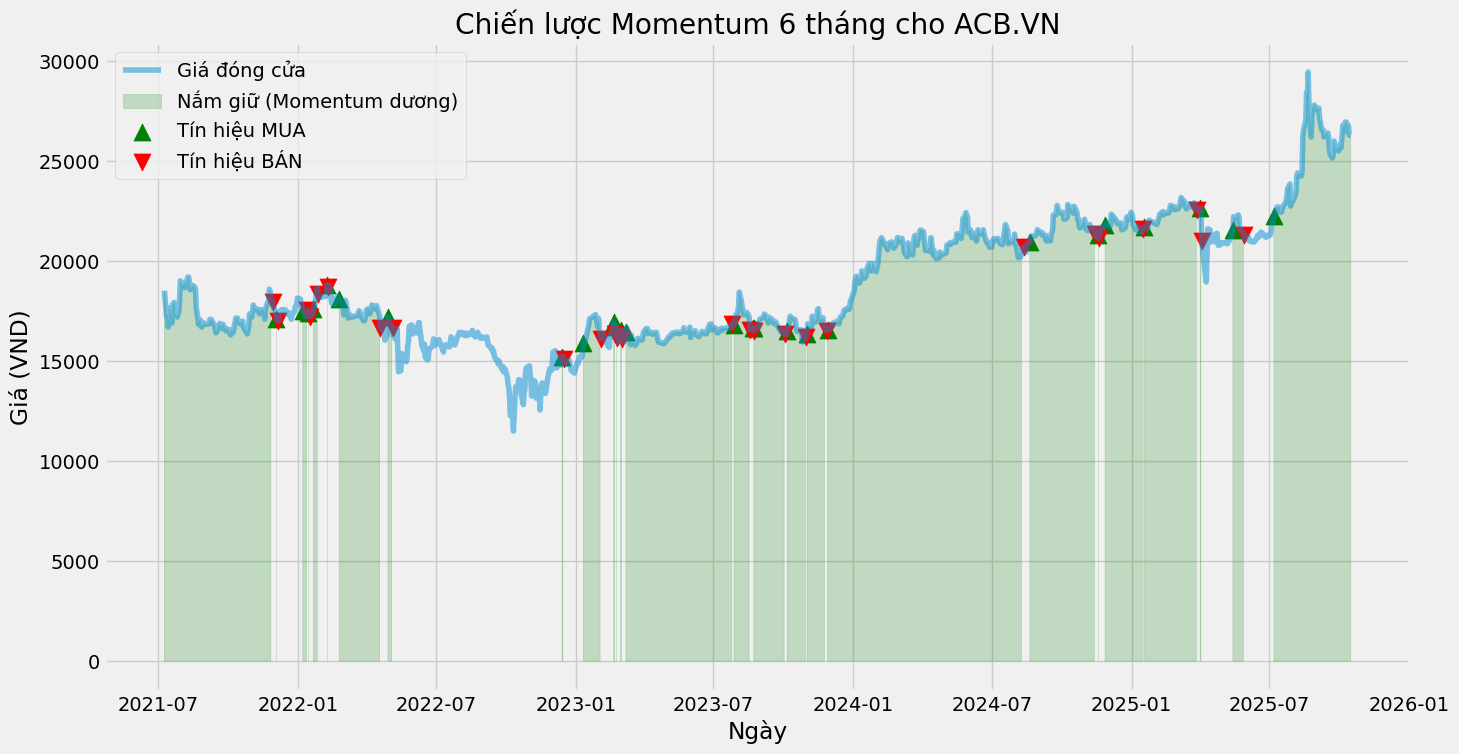

In [26]:
# --- 1. Tải và Chuẩn bị Dữ liệu ---
ticker = "ACB.VN"
data = yf.download(ticker, start=start_time, end=end_time, auto_adjust=False)

# Flatten the column names to a single level
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# --- 2. Tính toán Chỉ báo Momentum ---
lookback_period = 126 # Khoảng 6 tháng
# Tính Tỷ lệ thay đổi (ROC) trong chu kỳ nhìn lại
# Use the correct column name after flattening, which is 'Close_FPT.VN'
data['Momentum'] = data['Close_ACB.VN'].pct_change(periods=lookback_period)
data.dropna(inplace=True) # Xóa các hàng ban đầu có giá trị NaN

# --- 3. Tạo Tín hiệu Giao dịch ---
# Tín hiệu đơn giản: 1 có nghĩa là chúng ta "tham gia" thị trường, 0 là "đứng ngoài"
# Chúng ta vào lệnh/nắm giữ nếu momentum > 0, và thoát/đứng ngoài nếu momentum < 0.
data['Signal'] = np.where(data['Momentum'] > 0, 1, 0)

# Tìm các điểm vào/ra lệnh chính xác (nơi tín hiệu thay đổi)
data['Position'] = data['Signal'].diff()

# --- Trực quan hóa Chiến lược ---
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ giá đóng cửa
plt.plot(data['Close_ACB.VN'], label='Giá đóng cửa', alpha=0.5)

# Tô màu các giai đoạn chúng ta nắm giữ cổ phiếu (momentum > 0)
plt.fill_between(data.index, 0, data['Close_ACB.VN'], where=data['Signal']==1,
                 color='green', alpha=0.2, label='Nắm giữ (Momentum dương)')

# Đánh dấu các điểm vào lệnh (mua) và thoát lệnh (bán)
plt.scatter(data.index[data['Position'] == 1], data['Close_ACB.VN'][data['Position'] == 1],
            label='Tín hiệu MUA', marker='^', color='green', s=150)
plt.scatter(data.index[data['Position'] == -1], data['Close_ACB.VN'][data['Position'] == -1],
            label='Tín hiệu BÁN', marker='v', color='red', s=150)

plt.title(f'Chiến lược Momentum 6 tháng cho {ticker}')
plt.xlabel('Ngày')
plt.ylabel('Giá (VND)')
plt.legend()
plt.show()

--- KẾT QUẢ BACKTESTING ---
Tổng lợi nhuận Chiến lược Momentum: 111.15%
Tổng lợi nhuận Mua và Giữ: 142.04%


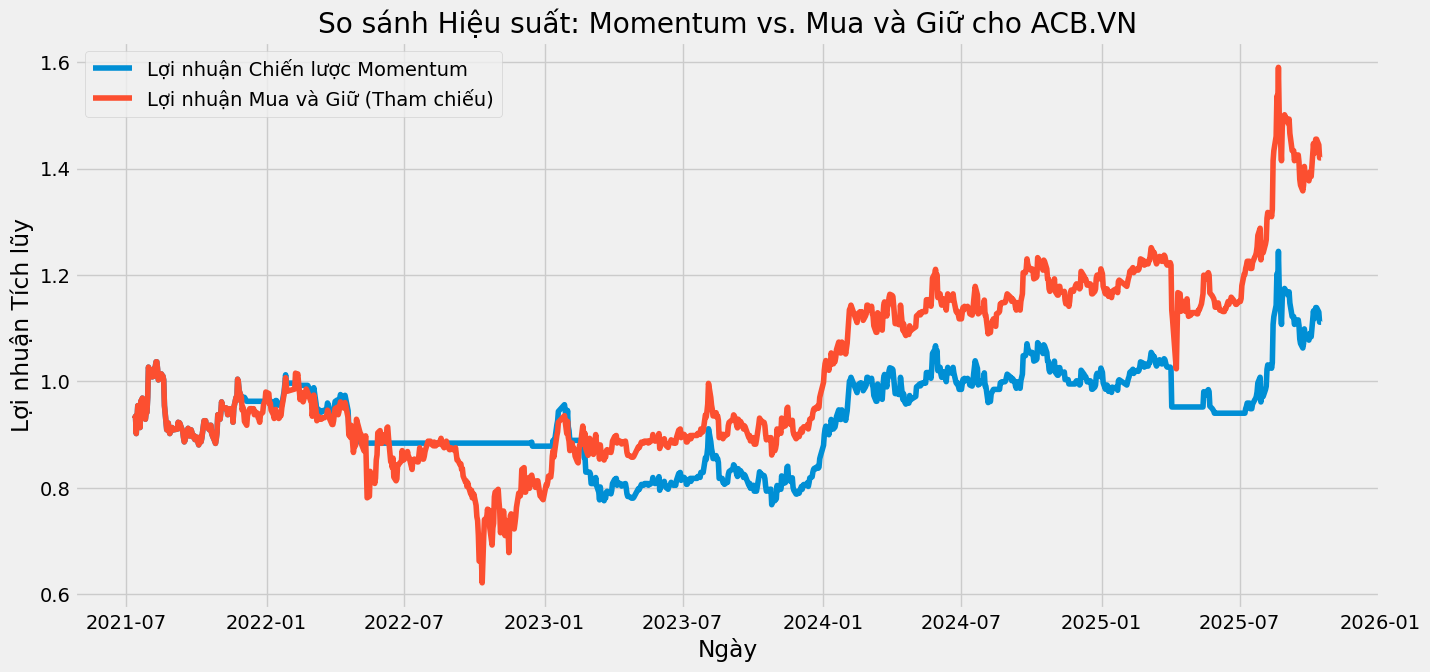

In [27]:
# --- 4. Backtest Chiến lược ---

# Tính toán lợi nhuận hàng ngày của việc chỉ mua và giữ cổ phiếu
data['Market_Returns'] = data['Close_ACB.VN'].pct_change()

# Tính toán lợi nhuận hàng ngày của chiến lược momentum
# Lợi nhuận chỉ được tính vào những ngày chúng ta đang NẮM GIỮ cổ phiếu.
# Chúng ta sử dụng .shift(1) trên vị thế để tránh "lỗi nhìn trước tương lai".
# Quyết định nắm giữ hôm nay dựa trên tín hiệu của ngày HÔM QUA.
data['Strategy_Returns'] = data['Market_Returns'] * data['Signal'].shift(1)

# Tính toán lợi nhuận tích lũy cho cả hai phương pháp
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# --- In Kết quả và Vẽ Biểu đồ Hiệu suất ---
print("--- KẾT QUẢ BACKTESTING ---")
total_strategy_return = data['Cumulative_Strategy_Returns'].iloc[-1]
total_market_return = data['Cumulative_Market_Returns'].iloc[-1]
print(f"Tổng lợi nhuận Chiến lược Momentum: {total_strategy_return:.2%}")
print(f"Tổng lợi nhuận Mua và Giữ: {total_market_return:.2%}")

# Vẽ đường cong vốn (lợi nhuận tích lũy)
plt.figure(figsize=(15, 7))
plt.plot(data['Cumulative_Strategy_Returns'], label='Lợi nhuận Chiến lược Momentum')
plt.plot(data['Cumulative_Market_Returns'], label='Lợi nhuận Mua và Giữ (Tham chiếu)')
plt.title(f'So sánh Hiệu suất: Momentum vs. Mua và Giữ cho {ticker}')
plt.xlabel('Ngày')
plt.ylabel('Lợi nhuận Tích lũy')
plt.legend()
plt.show()

# Using OHL to predict Close

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. TẢI VÀ CHUẨN BỊ DỮ LIỆU ---
ticker = "ACB.VN"
start_date = start_time
end_date = end_time # Use current date
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

# Lần này chúng ta lấy tất cả các cột cần thiết
features = ['Open', 'High', 'Low', 'Close']
all_data = data[features]
dataset = all_data.values

# --- 2. CHUẨN HÓA DỮ LIỆU ---
# Chuẩn hóa tất cả các cột về khoảng [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# --- 3. PHÂN CHIA DỮ LIỆU ---
split_date = '2025-01-01'
# Find the index location of the first date on or after split_date
training_data_len = all_data.index.searchsorted(split_date)

train_data = scaled_data[0:training_data_len, :]

# --- 4. TẠO CHUỖI DỮ LIỆU HUẤN LUYỆN ---
X_train = []
y_train = []
lookback_period = 60 # Sử dụng 60 ngày quá khứ để dự đoán

for i in range(lookback_period, len(train_data)):
    # X_train chứa 60 ngày dữ liệu, mỗi ngày 4 features
    X_train.append(train_data[i-lookback_period:i, :])
    # y_train là giá Close (cột thứ 4, index 3) của ngày tiếp theo
    y_train.append(train_data[i, 3])

X_train, y_train = np.array(X_train), np.array(y_train)

# --- 5. XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH LSTM ---
print("\nBắt đầu xây dựng và huấn luyện mô hình LSTM...")
model = Sequential()
# Input shape: (60 ngày, 4 features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
# Use a smaller number of epochs for demonstration
model.fit(X_train, y_train, batch_size=128, epochs=10)
print("Huấn luyện hoàn tất!")

# --- 6. TẠO DỮ LIỆU KIỂM TRA ĐỂ DỰ ĐOÁN ---
test_data = scaled_data[training_data_len - lookback_period:, :]
X_test = []
y_test_actual = dataset[training_data_len:, 3] # Giá Close thực tế để so sánh

for i in range(lookback_period, len(test_data)):
    X_test.append(test_data[i-lookback_period:i, :])

X_test = np.array(X_test)

# --- 7. DỰ ĐOÁN VÀ ĐẢO NGƯỢC CHUẨN HÓA ---
print("\nĐang thực hiện dự đoán...")
predictions_scaled = model.predict(X_test)

# Mẹo để đảo ngược chuẩn hóa: tạo một mảng dummy có 4 cột
# sau đó thay thế cột Close bằng giá trị dự đoán
dummy_predictions = np.zeros((len(predictions_scaled), len(features)))
dummy_predictions[:, 3] = predictions_scaled.flatten()
predictions = scaler.inverse_transform(dummy_predictions)[:, 3]

# --- 8. TRỰC QUAN HÓA KẾT QUẢ ---
train = all_data[:training_data_len]
valid = all_data[training_data_len:].copy()
valid['Predictions'] = predictions

[*********************100%***********************]  1 of 1 completed


Bắt đầu xây dựng và huấn luyện mô hình LSTM...
Epoch 1/10



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0553
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0060
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0057
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0049
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0037
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0026
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0023
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0022
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0024
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0020
Huấn luyện hoàn tất!

Đang thực hiện dự đoán...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


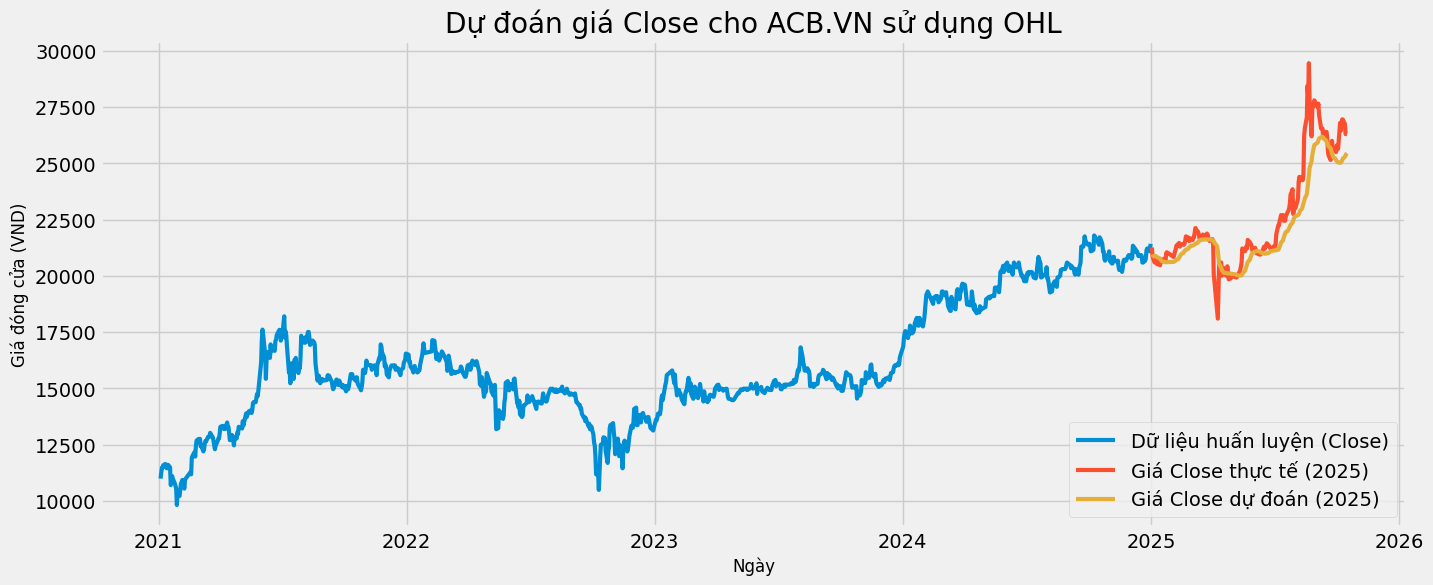

In [29]:
# Vẽ biểu đồ thực tế và dự đoán
plt.figure(figsize=(15, 6))
plt.title(f'Dự đoán giá Close cho {ticker} sử dụng OHL')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa (VND)', fontsize=12)
plt.plot(train.index, train['Close'], label='Dữ liệu huấn luyện (Close)', linewidth=3)
plt.plot(valid.index, valid['Close'], label='Giá Close thực tế (2025)', linewidth=3)
plt.plot(valid.index, valid['Predictions'], label='Giá Close dự đoán (2025)', linewidth=3)
plt.legend(loc='lower right')
plt.show()